<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [3]:
# Read CSV
house_csv = pd.read_csv('C:/Users/david/DATA/Sacramento_transactions.csv')
house_csv.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
house_csv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [5]:
house_csv.isnull() # 985 x 12

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
980,False,False,False,False,False,False,False,False,False,False,False,False
981,False,False,False,False,False,False,False,False,False,False,False,False
982,False,False,False,False,False,False,False,False,False,False,False,False
983,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
house_csv.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [7]:
# ANSWER
# NB.Rem df[]
price = house_csv['price']

#### 2.2 List all possible variables which might be Predictor variable.

In [8]:
# ANSWER
house_csv.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [9]:
house_csv.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [10]:
house_csv.shape

(985, 12)

In [11]:
house_csv.sample(10)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
79,9837 CORTE DORADO CT,ELK GROVE,95624,CA,4,2,1616,Residential,Wed May 21 00:00:00 EDT 2008,227887,38.400676,-121.381010
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
348,7541 SKELTON WAY,SACRAMENTO,95822,CA,3,1,1012,Residential,Mon May 19 00:00:00 EDT 2008,90000,38.484274,-121.488851
277,405 MARLIN SPIKE WAY,SACRAMENTO,95838,CA,3,2,1411,Residential,Tue May 20 00:00:00 EDT 2008,296769,38.657830,-121.456842
310,14 CASA VATONI PL,SACRAMENTO,95834,CA,0,0,0,Residential,Tue May 20 00:00:00 EDT 2008,433500,38.650221,-121.551704
610,127 QUASAR CIR,SACRAMENTO,95822,CA,2,2,990,Residential,Fri May 16 00:00:00 EDT 2008,66500,38.493504,-121.475304
659,8920 ROSETTA CIR,SACRAMENTO,95826,CA,3,1,1029,Residential,Fri May 16 00:00:00 EDT 2008,168750,38.544374,-121.370874
679,8952 ROCKY CREEK CT,ELK GROVE,95758,CA,3,2,1273,Residential,Fri May 16 00:00:00 EDT 2008,190000,38.431239,-121.440010
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
356,2987 PONDEROSA LN,SACRAMENTO,95815,CA,4,2,1120,Residential,Mon May 19 00:00:00 EDT 2008,102750,38.622243,-121.457863


In [12]:
house_csv.value_counts()

street                   city            zip    state  beds  baths  sq__ft  type         sale_date                     price   latitude   longitude  
7 CRYSTALWOOD CIR        LINCOLN         95648  CA     0     0      0       Residential  Mon May 19 00:00:00 EDT 2008  4897    38.885962  -121.289436    2
4734 14TH AVE            SACRAMENTO      95820  CA     2     1      834     Residential  Mon May 19 00:00:00 EDT 2008  68000   38.539447  -121.450858    2
8306 CURLEW CT           CITRUS HEIGHTS  95621  CA     4     2      1280    Residential  Mon May 19 00:00:00 EDT 2008  167293  38.715781  -121.298519    2
1 KENNELFORD CIR         SACRAMENTO      95823  CA     3     2      1144    Residential  Mon May 19 00:00:00 EDT 2008  200345  38.464520  -121.427606    1
6236 LONGFORD DR Unit 1  CITRUS HEIGHTS  95621  CA     2     1      795     Condo        Wed May 21 00:00:00 EDT 2008  116250  38.679776  -121.314089    1
                                                                           

In [14]:
h_type = house_csv['type']
print(h_type)

0      Residential
1      Residential
2      Residential
3      Residential
4      Residential
          ...     
980    Residential
981    Residential
982    Residential
983    Residential
984    Residential
Name: type, Length: 985, dtype: object


In [15]:
# type 
h_type.value_counts() 

Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: type, dtype: int64

<AxesSubplot:>

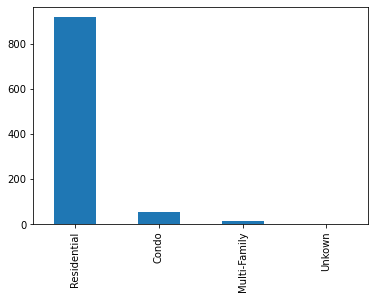

In [17]:
h_type.value_counts().plot.bar()

In [18]:
#beds
beds = house_csv['beds']

<AxesSubplot:>

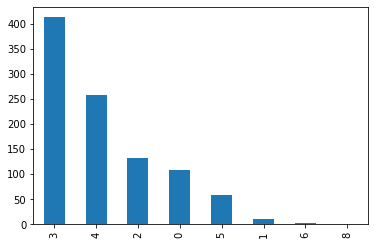

In [19]:
beds.value_counts().plot.bar()

<AxesSubplot:>

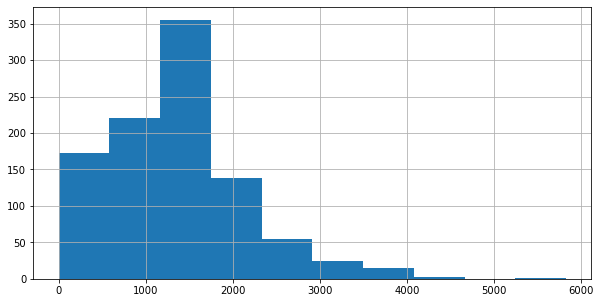

In [21]:
#sq_ft sq__ft! double underscore

size = house_csv['sq__ft']
size.hist(figsize=(10,5))


#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [22]:
# ANSWER 
house_csv.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


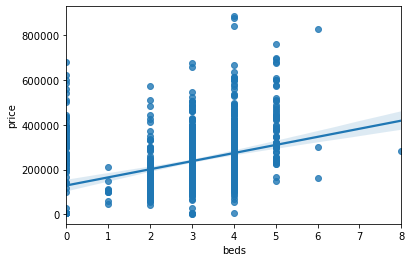

In [50]:
#beds and price
sns.regplot(x='beds',y='price', data=house_csv)
plt.show()

<AxesSubplot:xlabel='sq__ft', ylabel='price'>

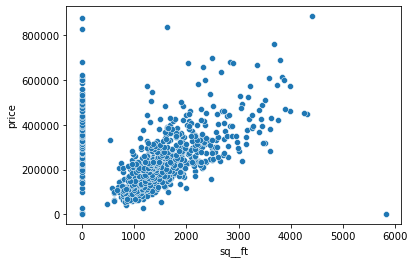

In [48]:
#size and price; use scatterplot
#makes most sense; beds, bath irrev cos under sqft
sns.scatterplot(x = 'sq__ft', y = 'price', data=house_csv)

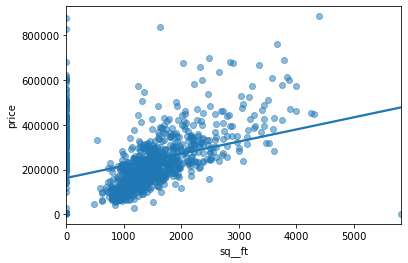

In [51]:
#how to add regression line?
#how to use ; for separate calls? alpha is transparency?!
sns.regplot(x='sq__ft', y='price', data=house_csv, ci=None,scatter_kws={'alpha':0.5})
plt.show()

In [5]:
# try groupby
sq__ft_price = house_csv.groupby[[('sq__ft'),[('price')]].mean;

SyntaxError: invalid syntax (<ipython-input-5-ea49af2cd871>, line 2)

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [46]:
house_csv['y_hat'] = house_csv['price'].mean()

In [47]:
X = house_csv['sq__ft']
Y = house_csv['price']
yhat = house_csv['y_hat']




In [44]:
def draw_plot(X,Y,yhat):
    
    fig = plt.figure(figsize=(15,7))  #plot data create fig
      
    ax = plt.gca() #get axis of fig
    
#plot scatter plot
    ax.scatter(X,Y,c='b')
    ax.plot(X,yhat,color='r');
    
plt.show()

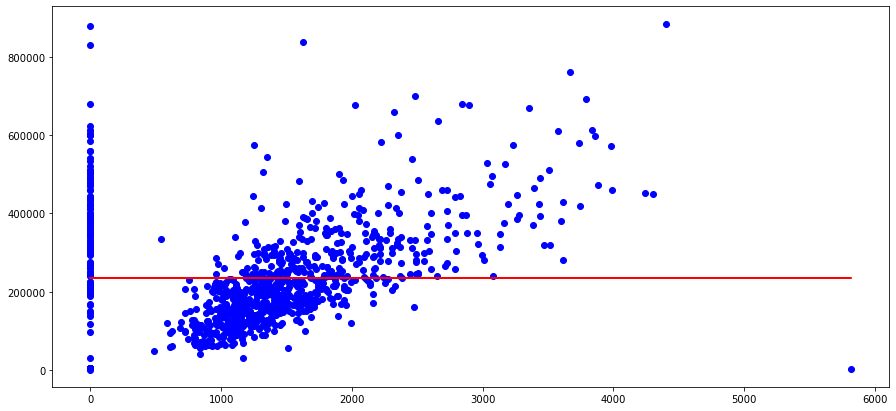

In [40]:
draw_plot(X,Y,yhat)


#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [45]:
#abs
res = abs(house_csv['price']-house_csv['y_hat']).mean()
res

103452.16956891476

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [ ]:
# ANSWER

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [ ]:
# ANSWER

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [ ]:
# ANSWER

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [ ]:
# ANSWER

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [ ]:
# ANSWER

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [ ]:
# ANSWER

##### 2.7.F [BONUS] Draw Plot of Predicted Line

In [ ]:
# ANSWER

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

In [ ]:
# ANSWER

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [ ]:
# ANSWER



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



